In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
sulcus = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/sulcal_morphometry/UKB_S.T.s._left.csv')
sulcus.head()

,IID,sulcus,label,side,surface_talairach,surface_native,maxdepth_talairach,maxdepth_native,meandepth_talairach,meandepth_native,hull_junction_length_talairach,hull_junction_length_native,GM_thickness,opening
0,1000021,S.T.s._left,S.T.s.,left,4878.53,3993.06,30.94,27.74,18.09,16.36,128.62,116.52,4.55,0.72
1,1000458,S.T.s._left,S.T.s.,left,5661.70,5103.54,24.86,23.70,14.84,14.22,178.66,168.64,3.99,1.31
2,1000575,S.T.s._left,S.T.s.,left,5171.99,3885.83,26.44,23.48,15.13,13.33,180.94,154.76,3.82,1.31
3,1000606,S.T.s._left,S.T.s.,left,5600.96,4510.19,27.32,25.00,14.64,13.29,192.26,170.88,4.95,0.40
4,1000963,S.T.s._left,S.T.s.,left,5443.66,4368.86,27.92,25.58,14.43,13.22,190.00,169.44,3.33,1.65


In [15]:
sulcus = a[['IID', 'opening']]
sulcus = sulcus.dropna()

In [16]:
UKB_info = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/participants_sex_age.csv')
UKB_info['participant_id']=UKB_info['participant_id'].apply(lambda x : int(x[-7:]))

In [17]:
c = pd.merge(sulcus, UKB_info, left_on='IID', right_on='participant_id', how='inner')
c.head()

,IID,opening,participant_id,Sex,Age
0,1000021,0.96,1000021,1,51.0
1,1000458,2.59,1000458,1,68.0
2,1000575,2.26,1000575,1,64.0
3,1000963,2.58,1000963,1,70.0
4,1001428,0.88,1001428,1,60.0


In [18]:
male = c[c['Sex']==1]
female = c[c['Sex']==0]

In [19]:
female[['Age', 'opening']].groupby('Age').describe()

opening                                                       
       count      mean       std   min     25%    50%     75%   max
Age                                                                
45.0     3.0  1.153333  0.296873  0.90  0.9900  1.080  1.2800  1.48
46.0    17.0  1.318824  0.666998  0.27  0.8400  1.400  1.7700  2.40
47.0    52.0  1.411154  0.913856  0.32  0.9625  1.190  1.6500  4.94
48.0   105.0  1.430952  0.604110  0.26  0.9700  1.330  1.8100  3.35
49.0   156.0  1.466923  0.687025  0.41  0.9775  1.360  1.8650  4.87
50.0   225.0  1.363778  0.683967  0.20  0.9500  1.260  1.6600  4.46
51.0   269.0  1.425911  0.757368  0.00  0.9300  1.300  1.7400  5.62
52.0   252.0  1.467976  0.771574  0.12  0.9600  1.270  1.7775  5.10
53.0   279.0  1.418172  0.700237  0.15  0.9650  1.350  1.7250  5.59
54.0   276.0  1.399493  0.696633  0.00  0.9875  1.285  1.7900  5.71
55.0   286.0  1.550629  0.835194  0.15  1.0600  1.435  1.7975  8.18
56.0   284.0  1.448838  0.768500  0.16  0.9600  1.315  1.7925  6.01
57.0   288.0  1.522396  0.761102  0.00  1.0250  1.405  1.8450  4.75
58.0   310.0  1.505032  0.752375  0.15  1.0100  1.390  1.9150  5.11
59.0   332.0  1.557530  0.822114  0.00  1.0300  1.370  1.9225  5.50
60.0   319.0  1.558495  0.866016  0.00  1.0600  1.410  1.9350  9.91
61.0   379.0  1.573113  0.692084  0.23  1.0200  1.490  1.9500  4.49
62.0   359.0  1.639861  0.861237  0.24  1.0800  1.470  2.0250  7.11
63.0   374.0  1.576631  0.815739  0.00  1.0425  1.415  1.9400  7.32
64.0   341.0  1.672522  0.884318  0.00  1.1400  1.550  1.9700  7.53
65.0   370.0  1.653405  0.770990  0.15  1.1400  1.510  2.0375  6.23
66.0   375.0  1.725840  0.839274  0.16  1.1900  1.560  2.1150  6.81
67.0   391.0  1.730307  0.792882  0.00  1.2100  1.580  2.0600  6.31
68.0   399.0  1.694812  0.780814  0.24  1.1700  1.600  2.1200  5.63
69.0   374.0  1.730749  0.751229  0.13  1.2300  1.650  2.1075  5.20
70.0   311.0  1.790386  0.774426  0.28  1.2800  1.590  2.1650  4.60
71.0   261.0  1.832644  0.821974  0.52  1.2500  1.640  2.2300  6.92
72.0   222.0  1.870586  0.912163  0.21  1.2250  1.720  2.2450  5.16
73.0   219.0  1.849543  0.811711  0.10  1.2750  1.730  2.2750  4.36
74.0   128.0  1.829688  0.803400  0.27  1.3675  1.705  2.1775  5.67
75.0    89.0  1.845730  0.727310  0.81  1.3300  1.630  2.2100  5.40
76.0    69.0  2.143768  0.802808  0.89  1.6700  1.980  2.5800  5.53
77.0    39.0  2.124103  0.780856  0.89  1.6000  1.930  2.6100  5.01
78.0    23.0  1.863478  0.691110  0.51  1.4200  1.560  2.3550  3.31
79.0    10.0  1.899000  0.795815  0.46  1.5850  2.005  2.2400  3.17
80.0     2.0  2.525000  0.997021  1.82  2.1725  2.525  2.8775  3.23

In [23]:
def plot_stats(stats, sex):
    # Extract statistics
    ages = stats.index
    mean_values = stats[('opening', 'mean')]
    std_values = stats[('opening', 'std')]
    percentile_25 = stats[('opening', '25%')]
    percentile_75 = stats[('opening', '75%')]

    # Plot
    plt.figure(figsize=(10, 6))

    # Plot mean with dots
    plt.plot(ages, mean_values, 'o-', label='Mean')

    # Add error bars for standard deviation
    plt.errorbar(ages, mean_values, yerr=std_values, fmt='o', label='Mean ± Std', color='blue', ecolor='gray', capsize=5)

    # Fill area between 25th and 75th percentiles
    plt.fill_between(ages, percentile_25, percentile_75, color='lightblue', alpha=0.4, label='25th-75th Percentile')

    # Customize plot
    plt.title(f'Statistics of Opening by Age -- {sex}')
    plt.xlabel('Age')
    plt.ylabel('Opening')
    plt.legend()
    plt.grid(True)
    plt.show()

In [25]:
female_stats = female[['Age', 'opening']].groupby('Age').describe()
male_stats = male[['Age', 'opening']].groupby('Age').describe()

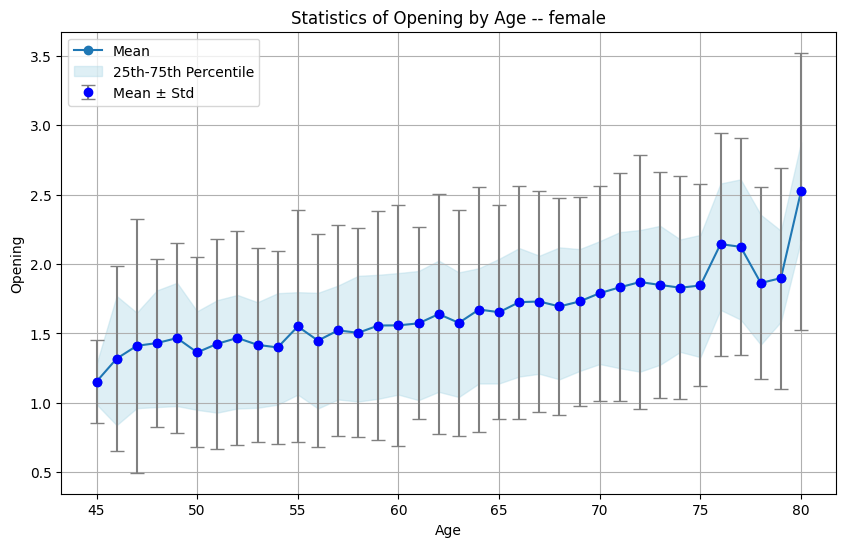

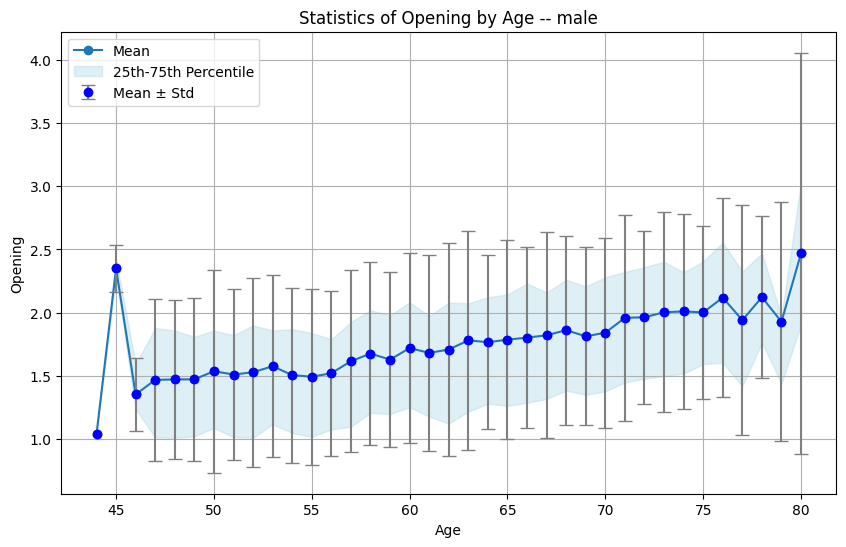

In [27]:
plot_stats(female_stats, 'female')
plot_stats(male_stats, 'male')